In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "https://raw.githubusercontent.com/wulannurafifah/Tugas1-Scrapping-Serpapi-Text-Mining/main/data_textmining_uts1.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,hotel_name,name,rating,review
0,Padma Hotel Semarang,M Sukrisman,5.0,Padma Hotel Semarang is a Luxury experience in...
1,Padma Hotel Semarang,Yuliana Cahyadi,5.0,Awesome!!!All of the staff is veerryyy helpful...
2,Padma Hotel Semarang,Adwin Suhanda,5.0,"Different design from the Padma group, definat..."
3,Padma Hotel Semarang,medy rahmatika,5.0,Hotel is meant to serve you with their hospita...
4,Padma Hotel Semarang,Gege Ate,1.0,Will make a two points of review: So the hotel...
...,...,...,...,...
245,Oak Tree Emerald Semarang,Esther Octavia,5.0,Good hotel good service good room. Great break...
246,Oak Tree Emerald Semarang,Jeremy Siregar,1.0,"My bed was infested with ants, the bathroom sm..."
247,Oak Tree Emerald Semarang,Ruri Fitriyanti,3.0,"The room size (deluxe) is big, but not too spa..."
248,Oak Tree Emerald Semarang,nurul fathya,4.0,"Nice place, cozy room, breakfast was far from ..."


In [ ]:
df.drop(columns = ['hotel_name', 'name'], inplace = True)

Preprocessing Data

Cleaning The Text

In [ ]:
import string
import re

In [ ]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [ ]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,Padma Hotel Semarang is a Luxury experience in...,padma hotel semarang is a luxury experience in...,1,289,5.5
1,5.0,Awesome!!!All of the staff is veerryyy helpful...,awesome all of the staff is veerryyy helpful...,1,215,7.0
2,5.0,"Different design from the Padma group, definat...",different design from the padma group definat...,1,185,7.0
3,5.0,Hotel is meant to serve you with their hospita...,hotel is meant to serve you with their hospita...,1,386,3.9
4,1.0,Will make a two points of review: So the hotel...,will make a two points of review so the hotel...,0,1573,3.5
...,...,...,...,...,...,...
245,5.0,Good hotel good service good room. Great break...,good hotel good service good room great break...,1,492,3.7
246,1.0,"My bed was infested with ants, the bathroom sm...",my bed was infested with ants the bathroom sm...,0,367,3.5
247,3.0,"The room size (deluxe) is big, but not too spa...",the room size deluxe is big but not too spa...,0,1214,3.8
248,4.0,"Nice place, cozy room, breakfast was far from ...",nice place cozy room breakfast was far from ...,1,124,3.2


Tokenization

In [ ]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,Padma Hotel Semarang is a Luxury experience in...,padma hotel semarang is a luxury experience in...,1,289,5.5,"[padma, hotel, semarang, is, a, luxury, experi..."
1,5.0,Awesome!!!All of the staff is veerryyy helpful...,awesome all of the staff is veerryyy helpful...,1,215,7.0,"[awesome, all, of, the, staff, is, veerryyy, h..."
2,5.0,"Different design from the Padma group, definat...",different design from the padma group definat...,1,185,7.0,"[different, design, from, the, padma, group, d..."
3,5.0,Hotel is meant to serve you with their hospita...,hotel is meant to serve you with their hospita...,1,386,3.9,"[hotel, is, meant, to, serve, you, with, their..."
4,1.0,Will make a two points of review: So the hotel...,will make a two points of review so the hotel...,0,1573,3.5,"[will, make, a, two, points, of, review, so, t..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,Padma Hotel Semarang is a Luxury experience in...,padma hotel semarang is a luxury experience in...,1,289,5.5,"[padma, hotel, semarang, is, a, luxury, experi...",padma hotel semarang luxury experience city ne...
1,5.0,Awesome!!!All of the staff is veerryyy helpful...,awesome all of the staff is veerryyy helpful...,1,215,7.0,"[awesome, all, of, the, staff, is, veerryyy, h...",awesome staff veerryyy helpful checked bit del...
2,5.0,"Different design from the Padma group, definat...",different design from the padma group definat...,1,185,7.0,"[different, design, from, the, padma, group, d...",different design padma group definately much m...
3,5.0,Hotel is meant to serve you with their hospita...,hotel is meant to serve you with their hospita...,1,386,3.9,"[hotel, is, meant, to, serve, you, with, their...",hotel meant serve hospitality facility hospita...
4,1.0,Will make a two points of review: So the hotel...,will make a two points of review so the hotel...,0,1573,3.5,"[will, make, a, two, points, of, review, so, t...",make two point review hotel looked beautiful n...


EDA

In [ ]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 250 rows and 8 columns
rating 1.0 = 14 rows
rating 2.0 = 14 rows
rating 3.0 = 33 rows
rating 4.0 = 67 rows
rating 5.0 = 122 rows


Number of null in label: 0
Number of null in text: 0


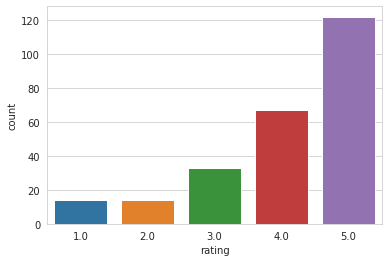

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

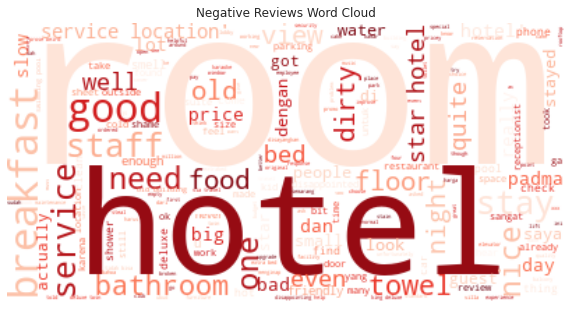

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

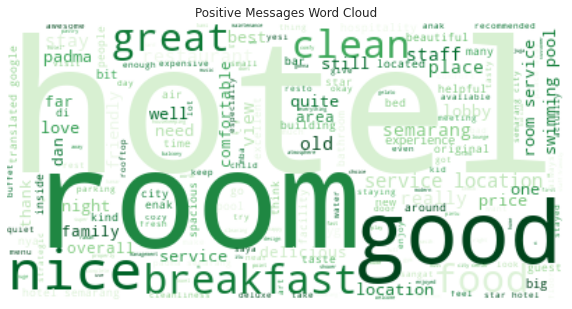

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [ ]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687
0,90,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.224972,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.227613,0.0,0.

Training different Classification models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.71      1.00      0.83        53

    accuracy                           0.71        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.50      0.71      0.59        75



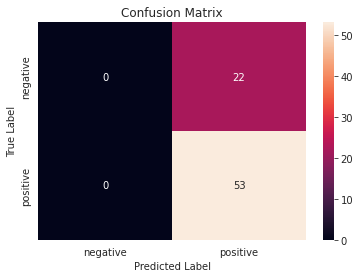

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        22
           1       0.73      1.00      0.84        53

    accuracy                           0.73        75
   macro avg       0.86      0.55      0.50        75
weighted avg       0.81      0.73      0.64        75



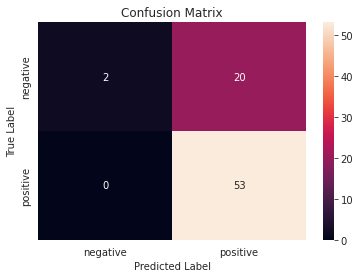

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.71      1.00      0.83        53

    accuracy                           0.71        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.50      0.71      0.59        75



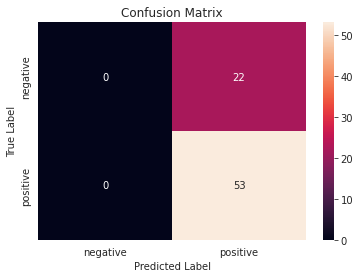

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.83      0.23      0.36        22
           1       0.75      0.98      0.85        53

    accuracy                           0.76        75
   macro avg       0.79      0.60      0.60        75
weighted avg       0.78      0.76      0.71        75



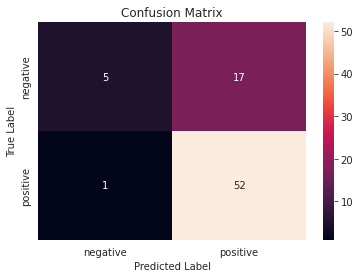

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.44      0.18      0.26        22
           1       0.73      0.91      0.81        53

    accuracy                           0.69        75
   macro avg       0.59      0.54      0.53        75
weighted avg       0.64      0.69      0.65        75



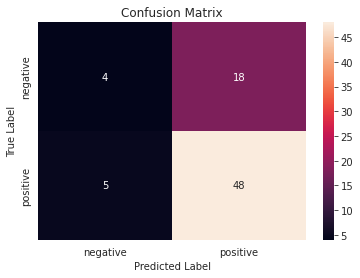

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.80      0.18      0.30        22
           1       0.74      0.98      0.85        53

    accuracy                           0.75        75
   macro avg       0.77      0.58      0.57        75
weighted avg       0.76      0.75      0.68        75



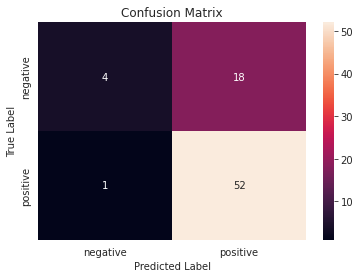

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.777124183006536 
 precision - 0.777124183006536 
 recall - 1.0 
 f1 - 0.8744892473118279 

Logistic Regression
 accuracy - 0.7767973856209152 
 precision - 0.7880147058823529 
 recall - 0.9780219780219781 
 f1 - 0.8719030404152763 

Random Forest
 accuracy - 0.7888888888888889 
 precision - 0.778921568627451 
 recall - 0.9928571428571429 
 f1 - 0.8758110863922877 

SVM
 accuracy - 0.8117647058823529 
 precision - 0.8191234827264239 
 recall - 0.9785714285714286 
 f1 - 0.890117326129562 

KNN
 accuracy - 0.7212418300653595 
 precision - 0.7849237772031888 
 recall - 0.8846153846153847 
 f1 - 0.8293450100346652 

Extra Trees
 accuracy - 0.7833333333333333 
 precision - 0.8036060834590246 
 recall - 0.9571428571428571 
 f1 - 0.8713506777077411 



Prediction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.76

In [ ]:
data = ["Good", "dirty", "clean","slow"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 0 1 0]
